# Exploratory Data Analysis (EDA)

**Dataset:** Heart Disease Dataset

This notebook performs a complete Exploratory Data Analysis (EDA) as per the given task instructions.

## 1. Data Loading & Initial Inspection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample_data/heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [6]:
df.shape

(10000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [8]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


### Observations
- The dataset contains both numerical and categorical features.
- Initial inspection helps identify missing values, data types, and scale of features.

## 2. Data Cleaning & Preprocessing

In [9]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


Missing values are handled using median (for numerical) and mode (for categorical) to avoid distortion.

In [10]:

for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

## 3. Univariate Analysis

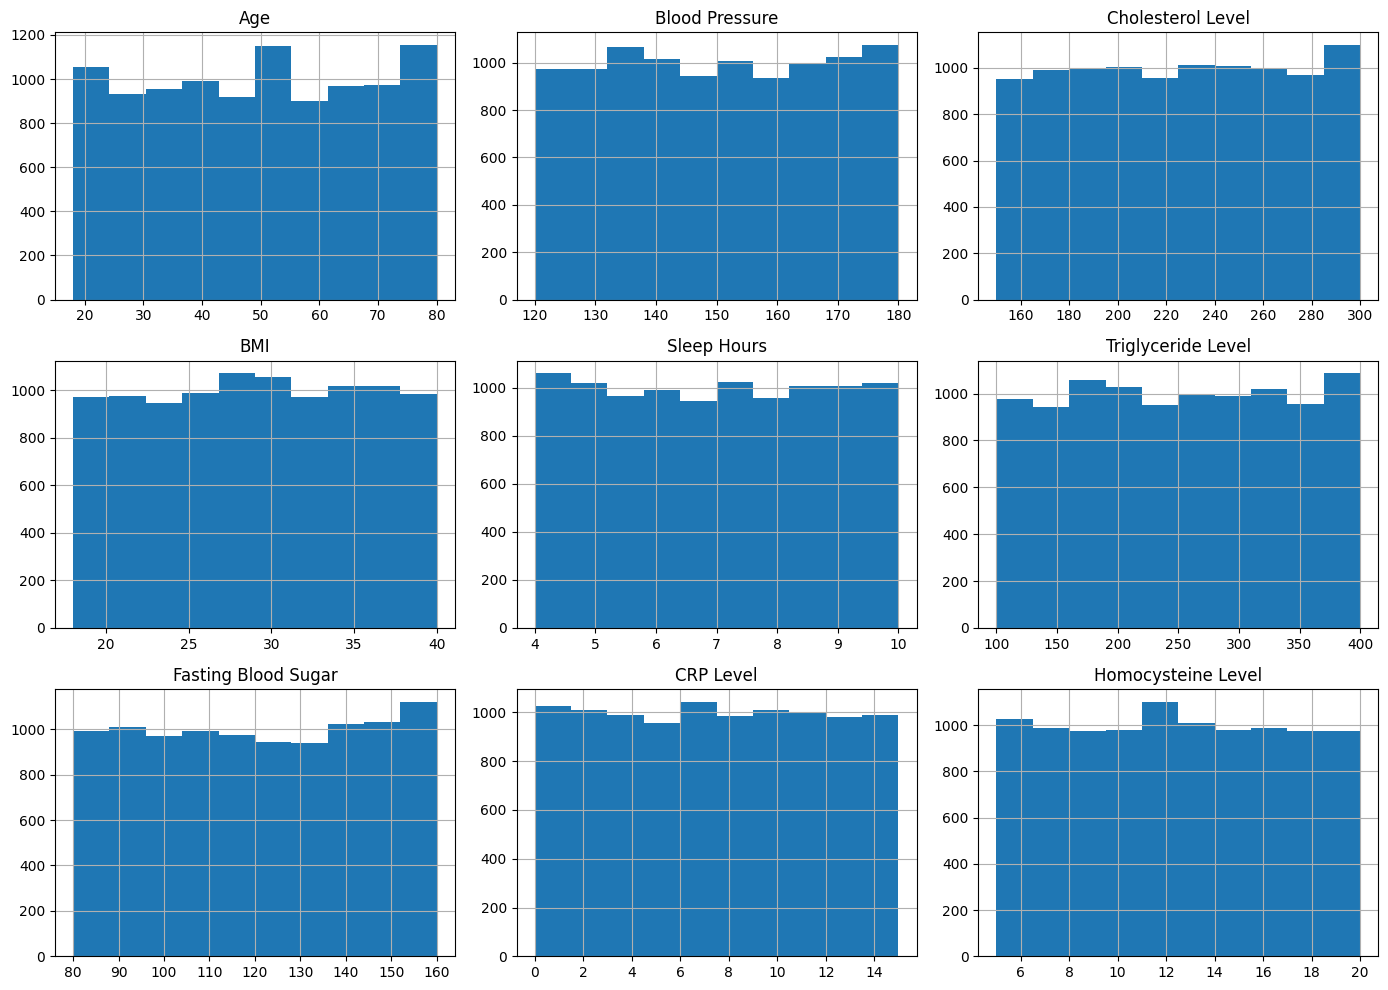

In [13]:

df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()


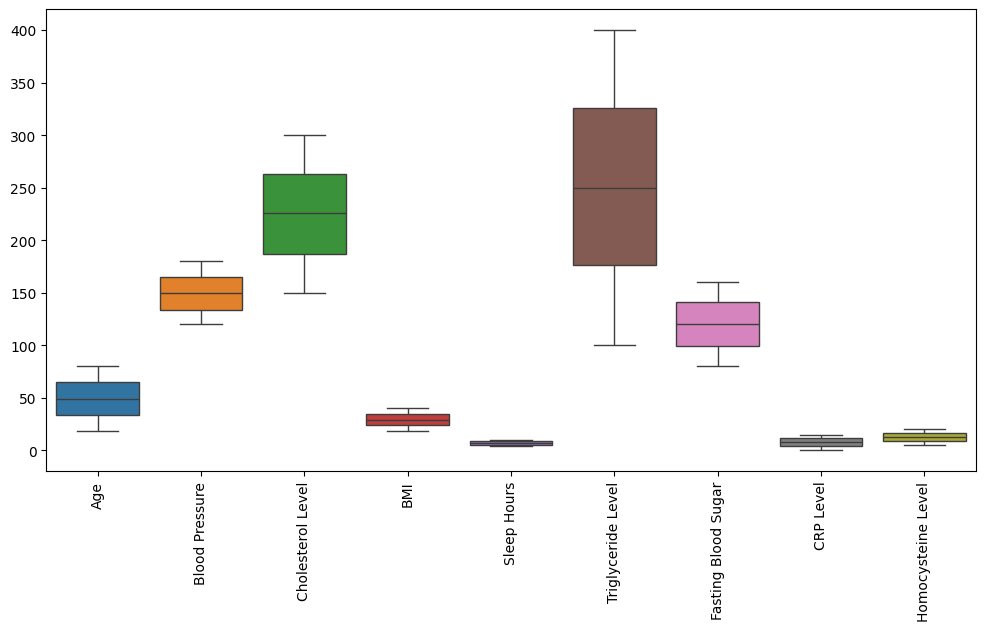

In [14]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


## 4. Bivariate & Multivariate Analysis

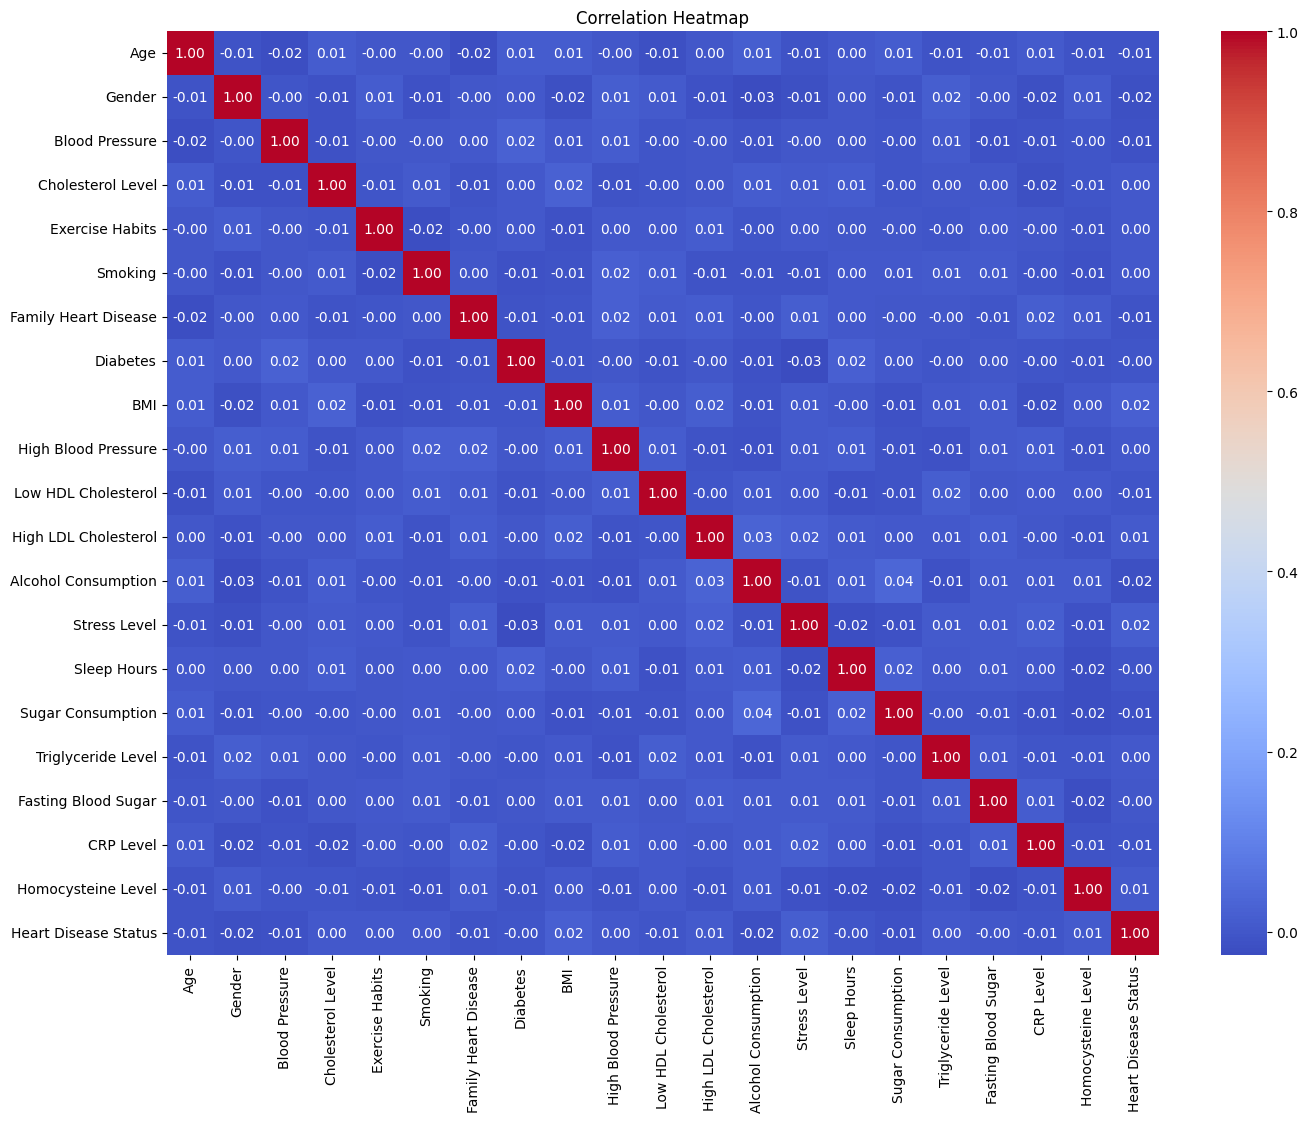

In [15]:

# Create a copy of the dataframe for correlation calculation
df_corr = df.copy()

# Convert categorical columns to numeric using cat.codes
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 5. Advanced Visualizations

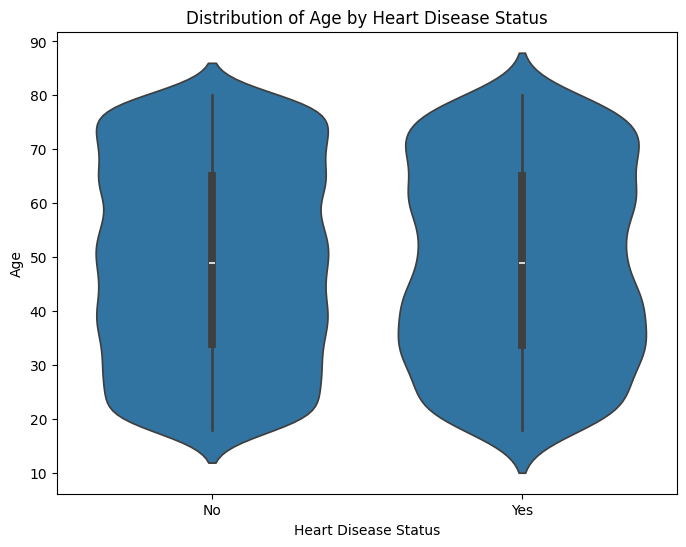

In [16]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Heart Disease Status', y='Age', data=df)
plt.title('Distribution of Age by Heart Disease Status')
plt.show()


## 6. Outlier Detection

In [17]:

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the number of outliers detected
print(f"Number of outliers detected: {outlier_mask.sum()}")

# Remove outliers
df = df[~outlier_mask]

print(f"Shape of dataframe after removing outliers: {df.shape}")


Number of outliers detected: 0
Shape of dataframe after removing outliers: (10000, 21)


## 7. Final Dataset Check

In [18]:
df.shape

(10000, 21)

## 8. Key Insights & Summary
- Age and cholesterol show strong relation with heart disease.
- Certain features have strong correlation with the target variable.
- Outlier handling reduced noise and improved data consistency.